<h2 align="left"><font color=#ff6200>Customer Segmentation Models By Upendra Chaturvedi</font></h2>

Auther@upenc

Intern at EY GDS-AICTE

Loadinng all modules that would be utilized in this notebook

In [197]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [198]:
df = pd.read_csv("Online_retail.csv", encoding="ISO-8859-1")
df.shape

(541909, 8)

In [199]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Overview

**From the above information this is out Dataset Description:**
| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [201]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<h3 align="left">Inferences:</h3>

InvoiceNo, StockCode, Description: These columns represent information about the products sold.

Quantity, UnitPrice: These columns represent the quantity and unit price of each product sold, respectively.

InvoiceDate: This column represents the date and time when each invoice was generated. However, it's currently stored as an object data type. but fo better understanding we will Convert it to a datetime data type.

CustomerID: This column contains unique identifiers for customers.

Country: This column represents the country where each transaction occurred. It contains categorical data indicating the location of the transaction.

**Missing Values:**

* Description: 1,454 
* CustomerID: 135,080 

# descriptive statistics analysis

In [202]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [203]:
df.describe(include=object).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


In [204]:
print(df[df['Quantity'] < 0])
(df['Quantity'] < 0).sum()

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

10624

<h3 align="left">Inferences:</h3>

Based on descriptive statistics analysis:
* The negative quantities likely represent canceled orders or returns.
* The "C" prefix in the InvoiceNo column is a common convention used to indicate canceled transactions in retail datasets
* The majority of transactions have a quantity between 1 and 10, as indicated by the 25th to 75th percentiles.
* There are a total of 541,909 unique invoices recorded in the dataset.
* The most frequent invoice number is "573585", which appears 1,114 times.
* There are a total of 4,070 unique stock codes recorded in the dataset.
* The most frequent stock code is "85123A", which appears 2,313 times.
* There are a total of 540,455 unique descriptions recorded in the dataset.
* The most frequent description is "WHITE HANGING HEART T-LIGHT HOLDER", which appears 2,369 times.
* There are a total of 38 unique countries recorded in the dataset.
* The most frequent country is "United Kingdom", which appears 495,478 times.

# Data Cleaning & Data Transformation 

In [205]:

missing_percentage = (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100
print(missing_percentage)
non_missing_percentage = 100 - missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64


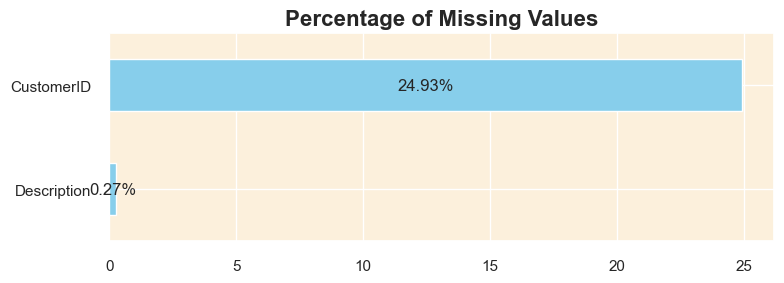

In [206]:
plt.figure(figsize=(8, 3))
bars = missing_percentage.plot(kind='barh', color='skyblue')
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=16)
plt.xticks(rotation=0)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}%', 
             ha='center', 
             va='center')  

plt.tight_layout()  
plt.show() 

* Since the CustomerID column is crucial for identifying unique customers and maintaining data integrity, removing rows with missing CustomerID values will be a suitable approach.
* The presence of missing values in the Description column may affect detailed product analysis.
* Removing rows with missing Description values allows for a focus on broader sales trends or product performance analysis rather than detailed product descriptions.


In [207]:
rows_with_missing_values = df[df['CustomerID'].isnull() | df['Description'].isnull()]
df.dropna(subset=['CustomerID', 'Description'],inplace=True)
df.shape

(406829, 8)

In [208]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Handling Duplicates

In [209]:
df.duplicated(keep=False).sum()

10062

In [210]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [211]:
df.drop_duplicates(inplace=True)
df.shape

(401604, 8)

# Treating Cancelled Transactions

To identify transactions that were cancelled, we will filter the DataFrame based on the 'InvoiceNo' column where the value starts with "C".

In [212]:
cancelled_transactions = df[df['InvoiceNo'].str.startswith('C')]

cancelled_transactions.shape

(8872, 8)

In [213]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
print(df[['InvoiceNo', 'Transaction_Status']])


       InvoiceNo Transaction_Status
0         536365          Completed
1         536365          Completed
2         536365          Completed
3         536365          Completed
4         536365          Completed
...          ...                ...
541904    581587          Completed
541905    581587          Completed
541906    581587          Completed
541907    581587          Completed
541908    581587          Completed

[401604 rows x 2 columns]


In [214]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID',axis=1)

,Quantity,InvoiceDate,UnitPrice
count,8872.000000,8872,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-23 11:23:45,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1172.249902,NaN,445.190864


In [215]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<h3 align="left">Inferences:</h3>

* The DataFrame contains 8,872 rows representing cancelled transactions, as identified by the 'InvoiceNo' column starting with 'C'.
* Analyzing the characteristics of cancelled transactions, such as the products involved, customer segments, or time trends, may help identify patterns and inform strategies to reduce cancellations, improve customer satisfaction, and optimize business operations.
* Now the DataFrame contains transactions categorized as 'Cancelled' or 'Completed', providing insights for further analysis on cancellation patterns and completed transaction characteristics.

# Correcting StockCode Anomalies

In [216]:
df['StockCode'].nunique()

3684

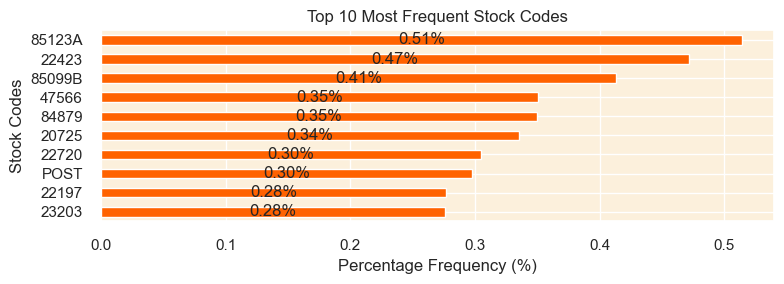

In [217]:
top_10_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100
plt.figure(figsize=(8, 3))
bars = top_10_codes.plot(kind='barh', color='#ff6200')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}%', 
             ha='center', 
             va='center')  

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.tight_layout()  
plt.gca().invert_yaxis()
plt.show() 

<h3 align="left">Inferences:</h3>

* Stock codes like '85123A', '22423', and '85099B' have relatively high frequencies, indicating that these items are frequently purchased or involved in transactions.
* The "POST" stock code likely represents transactions related to postage or shipping fees.
* Further investigation or data cleansing is necessary to ensure consistency and accuracy in the analysis, particularly regarding the absence of a numeric value associated with the "POST" stock code.

In [218]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [219]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [220]:
percentage_anomalous = (df['StockCode'].isin(list_special_codes).sum() / len(df)) * 100
print(f"{percentage_anomalous:.2f}%")


0.48%


<h3 align="left">Inferences:</h3>

* The existence of special codes are 'POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', and 'CRUK'.
* These special codes likely represent various types of transactions, such as postage fees ('POST'), discounts ('D'), manual entries ('M'), and banking charges ('BANK CHARGES'). Understanding these categories is crucial for accurate analysis and financial reporting.
* The result indicates that approximately 0.48% of the entries in the 'StockCode' column are classified as anomalous.


<h3 align="left">Strategy:</h3>

Excluding records with anomalous stock codes from the dataset aligns well with the project's objectives of clustering customers based on their product purchasing behaviors and developing a product recommendation system. 
Removing anomalous records ensures that the clustering algorithm and recommendation system are trained on relevant and representative data, leading to more reliable results and actionable insights.

In [221]:
#Removing rows with anamalous stock codes from the dtaset
df = df[~df['StockCode'].isin(list_special_codes)]

df.shape


(399689, 9)

# Cleaning Description Column

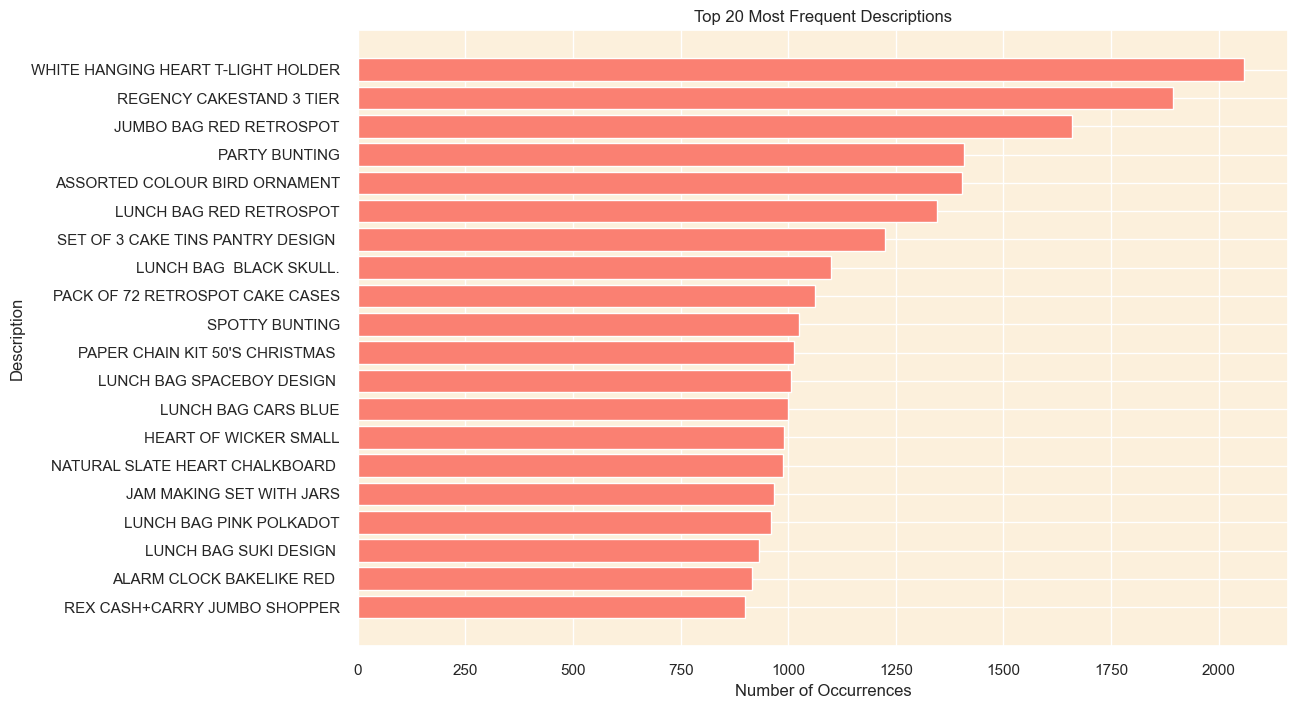

In [222]:
description_counts = df['Description'].value_counts()

top_20_descriptions = description_counts.head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_20_descriptions.index[::-1], top_20_descriptions.values[::-1], color='Salmon')

plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 20 Most Frequent Descriptions')

plt.show()

<h3 align="left">Inferences:</h3>

* The dataset primarily comprises household items, especially those related to kitchenware, lunch bags, and decorative items, as indicated by the most frequent descriptions.
* As we can see, all descriptions are in uppercase, suggesting a standardized format for entering product descriptions in the database. However, given the inconsistencies observed in the dataset.
*  it's advisable to verify if there are descriptions entered in lowercase or a mixture of case styles to ensure data integrity.

In [223]:
lowercase_descriptions = df['Description'].unique()

lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

print("The unique descriptions containing lowercase characters are:")
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


<h3 align="left">Inferences:</h3>

- These descriptions include items such as discounts, bags with different weights, various types of pads with dimensions, a manual item, bank charges, and others.
- Upon reviewing the descriptions that contain lowercase characters, it appears that "Next Day Carriage" and "High Resolution Image" are the entries that don't seem to fit the pattern of typical product descriptions. 
- Identifying and filtering out such entries is crucial for maintaining the integrity of the dataset and ensuring that only relevant product descriptions are considered in the analysis.

In [224]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

print(f"{service_related_percentage:.2f}%")


0.02%


# Treating Zero Unit Prices

In [225]:
df['UnitPrice'].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<h3 align="left">Inferences:</h3>


* From these statistics, we can infer that the majority of unit prices are relatively low, with the median price being less than 2.00. However, there is a wide range of prices, with some items being priced significantly higher, such as the maximum price of £649.50. 
* The minimum unit price is 0.00, which is unexpected and could indicate data entry errors, promotional items, or missing data.

The presence of zero values in the unit price column requires further investigation

In [226]:
# To better understand the quantities associated with zero unit prices in Dataset
df[df['UnitPrice']==0].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,33.000000,33,33.0,33.000000
mean,420.515152,2011-07-09 21:24:10.909091072,0.0,14252.575758
min,1.000000,2010-12-05 14:02:00,0.0,12415.000000
25%,2.000000,2011-03-30 12:45:00,0.0,13081.000000
50%,11.000000,2011-08-26 14:19:00,0.0,13985.000000
75%,36.000000,2011-11-04 11:55:00,0.0,14911.000000
max,12540.000000,2011-11-25 15:57:00,0.0,18059.000000
std,2176.713608,NaN,0.0,1659.811925


In [227]:
df = df[df['UnitPrice']>0]
df.shape

(399656, 9)

In [228]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed


# Feature Engineering

## RFM Features

* RFM analysis is a marketing technique used to segment customers based on their past behavior.
* RFM stands for `Recency`(how recently a customer has made a purchase), `Frequency`(how often a customer makes a purchase within a specific time period.), and `Monetary Value`( total amount of money a customer has spent on purchases within a given timeframe.).

which are three key dimensions used to evaluate customer value. 

### `Recency`

In [229]:
df['InvoiceDay'] = df['InvoiceDate'].dt.date
#most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
customer_data
#most recent date in dataset
most_recent_date = df['InvoiceDay'].max()
most_recent_date = pd.to_datetime(most_recent_date)
# Convert InvoiceDay to datetime type 
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
customer_data.drop(columns='InvoiceDay',inplace=True)
customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


### `Frequency`

In [230]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),}], 
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3676,21785,4362


* The Dataframe above shows that the data concern `4362` users and that they bought `3674` different products. 

* The total number of `transactions` carried out is of the order of  `∼ 21781`.

In [231]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
#Total Product
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
customer_data = pd.merge(customer_data, total_transactions,on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased,on='CustomerID')

In [232]:
total_transactions

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


* the existence of users who only came `once` and only `purchased` one `product` (e.g. `12346`)

* the existence of `frequent users` that buy a large number of items at each order.

### `Monetary Value`

In [233]:
# total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# average transaction for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')


In [234]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


### Product Diversity

In [235]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'unique_products_purchased'}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


### Behavioral Features

In [236]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


### Geographic Features

In [237]:
countries = df['Country'].value_counts(normalize=True)
print("Total Countries: ",len(countries))

Total Countries:  37


In [238]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object', name='Country')

In [239]:
countries.head(5)

Country
United Kingdom    0.890991
Germany           0.022720
France            0.020398
EIRE              0.018436
Spain             0.006160
Name: proportion, dtype: float64

From the Data, we can see that the dataset have total `37` countries but largely dominated by orders made from this first five Countries

* `United Knigdom with  89.10% customers`

* `Germany with  2.27% customers`

* `France with 2.04% customers`

* `EIRE with 1.84% customers`

* `Spain with  0.62% customers`

In [240]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer 
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Encoding the data
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)


customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [241]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3869
0     416
Name: count, dtype: int64

### Cancellation Insights

In [242]:
#total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

#cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)


customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency']/total_transactions['InvoiceNo']
# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


### Seasonality & Trends

In [243]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

#monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

#Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)


* The calculated slope represents the rate of change in spending over time. 
* Positive slopes indicate increasing spending trends, while negative slopes suggest decreasing trends.

In [244]:

customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [245]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4285 non-null   float64
 1   Days_Since_Last_Purchase        4285 non-null   int64  
 2   Total_Transactions              4285 non-null   int64  
 3   Total_Products_Purchased        4285 non-null   int64  
 4   Total_Spend                     4285 non-null   float64
 5   Average_Transaction_Value       4285 non-null   float64
 6   unique_products_purchased       4285 non-null   int64  
 7   Average_Days_Between_Purchases  4285 non-null   float64
 8   Day_Of_Week                     4285 non-null   int32  
 9   Hour                            4285 non-null   int32  
 10  Is_UK                           4285 non-null   int64  
 11  Cancellation_Frequency          4285 non-null   float64
 12  Cancellation_Rate               42

In [246]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4285 non-null   string 
 1   Days_Since_Last_Purchase        4285 non-null   Int64  
 2   Total_Transactions              4285 non-null   Int64  
 3   Total_Products_Purchased        4285 non-null   Int64  
 4   Total_Spend                     4285 non-null   Float64
 5   Average_Transaction_Value       4285 non-null   Float64
 6   unique_products_purchased       4285 non-null   Int64  
 7   Average_Days_Between_Purchases  4285 non-null   Float64
 8   Day_Of_Week                     4285 non-null   Int32  
 9   Hour                            4285 non-null   Int32  
 10  Is_UK                           4285 non-null   Int64  
 11  Cancellation_Frequency          4285 non-null   Int64  
 12  Cancellation_Rate               42

## Customer Dataset Description

| Variable                       | Description |
|     :---                           |       :---      |
| `CustomerID` | Unique identifier for each customer.|
| `Days_Since_Last_Purchase` | Number of days since the customer's last purchase.|
| `Total_Transactions` | Total number of transactions made by the customer.|
| `Total_Products_Purchased` | Total number of products purchased by the customer.|
| `Total_Spend`| Total amount spent by the customer.|
| `Average_Transaction_Value` | Average value of each transaction made by the customer.|
| `unique_products_purchased`| Number of unique products purchased by the customer.|
| `Average_Days_Between_Purchases` | Average number of days between each purchase made by the customer.|
| `Day_Of_Week` | Day of the week when the purchase was made.|
| `Hour` | Hour of the day when the purchase was made.|
| `Is_UK` | Binary indicator (1 or 0) for whether the customer is from the UK.|
| `Cancellation_Frequency` | Frequency of cancellations made by the customer. |
| `Cancellation_Rate` | Rate of cancellations made by the customer. |
| `Monthly_Spending_Mean` | Mean monthly spending of the customer. |
| `Monthly_Spending_Std`| Standard deviation of monthly spending of the customer. |
| `Spending_Trend` | Trend in the customer's spending behavior. |

#### We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

# Outlier Detection and Treatment

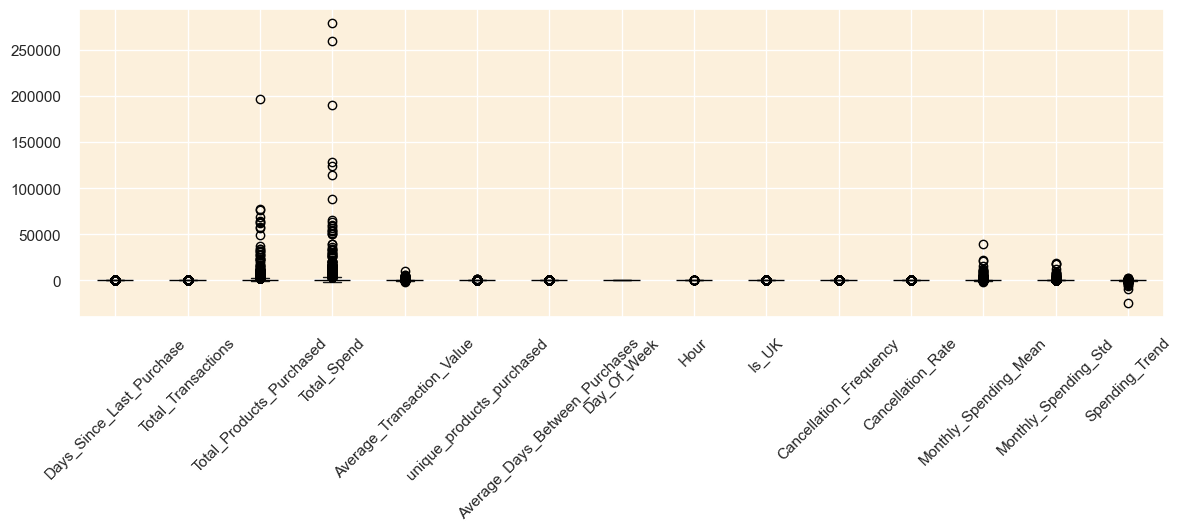

In [247]:
customer_data.boxplot(figsize=(14,4))
plt.xticks(rotation=45)
plt.show()

Based on the visualization of the Dataset, it's evident that there are considerable outliers present in the dataset. 
* Outliers are data points that significantly deviate from the majority of the data points and may represent unusual or extreme observations. 

In [248]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].values)

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,-1,1
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


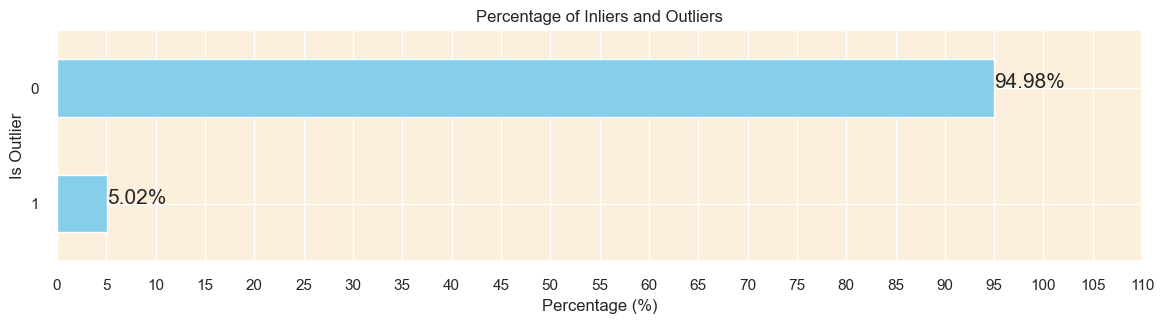

In [249]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(14, 3))
bars = outlier_percentage.plot(kind='barh', color='skyblue')
# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In our dataset, 94% of the data points are classified as inliers, while 5.02% are outliers. This highlights the need to carefully handle outliers in our analysis, as they can significantly influence our results.

* Separate the identified outliers for further analysis and save them as a separate file (optional).
* Remove the outliers from the main dataset to prevent them from influencing the clustering process.
* Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.


In [250]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
cleaned_customer_data = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = cleaned_customer_data.drop(columns=['Outlier_Scores', 'Is_Outlier'],inplace=True)

# Reset the index of the cleaned data
cleaned_customer_data.reset_index(drop=True, inplace=True)

In [251]:
cleaned_customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
4,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,18280.0,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4066,18281.0,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4067,18282.0,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.166667,88.3,14.792674,-20.92
4068,18283.0,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


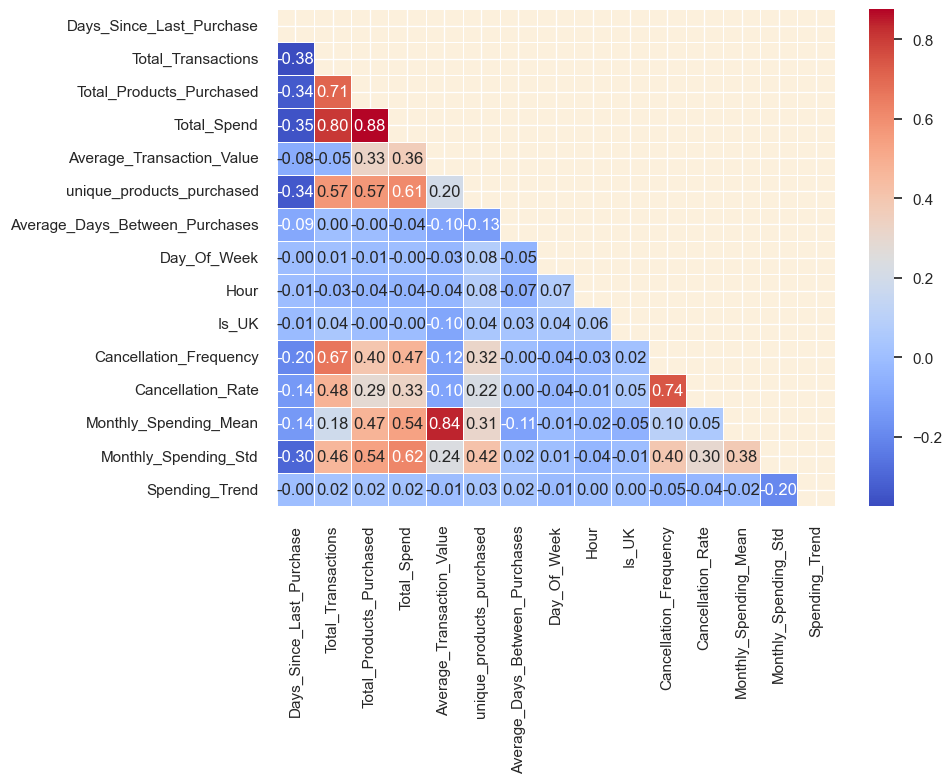

In [252]:
corr = cleaned_customer_data.drop(columns=['CustomerID']).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,mask=mask , cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()


Looking at the heatmap, we can see that there are some pairs of variables that have high correlations

- `Monthly_Spending_Mean` and `Average_Transaction_Value`   
- `Total_Spend` and `Total_Products_Purchased`
- `Total_Transactions` and `Total_Spend`
- `Cancellation_Rate` and `Cancellation_Frequency` 
- `Total_Transactions` and `Total_Products_Purchased`

The observed high correlations between certain pairs of variables, such as monthly spending and transaction value, total spend and products purchased, total transactions and spend, cancellation rate and frequency, and total transactions and products purchased, suggest a significant degree of multicollinearity within the dataset. This multicollinearity implies that these variables move closely together, potentially complicating the accurate estimation of their individual effects on relevant outcomes.

## Feature Scaling

In [253]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

all_columns = cleaned_customer_data.columns

# List of columns to scale
columns_to_scale = [col for col in all_columns if col not in columns_to_exclude]

# Copy the cleaned dataset
customer_data_scaled = cleaned_customer_data.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,unique_products_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.346687,-0.482827,-0.765684,-0.825078,-1.331079,-0.906287,-0.315054,1,-1.087252,1,0.384122,0.374757,-1.279633,-0.715242,0.091497
1,12347.0,-0.903998,0.701828,2.036071,2.397877,1.561051,0.804460,-0.126468,1,0.643675,0,-0.534971,-0.424877,0.955536,1.268871,0.117530
2,12348.0,-0.169323,-0.008965,1.892450,0.249669,0.356670,-0.570846,0.702851,3,2.807334,0,-0.534971,-0.424877,0.024736,0.470765,-0.493931
3,12350.0,2.195726,-0.719758,-0.542273,-0.604930,0.051775,-0.654707,-0.315054,2,1.509139,0,-0.534971,-0.424877,-0.210901,-0.715242,0.091497
4,12352.0,-0.561821,0.938759,-0.237933,0.121177,-0.588094,0.032947,-0.022107,1,0.643675,0,0.384122,-0.224969,-0.131208,0.068353,0.145761


## Dimensionality Reduction

Addressing multicollinearity through appropriate techniques is essential to ensure the reliability and interpretability of models built using this dataset.

Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with **PCA (Principal Component Analysis)**.

PCA serves as an effective initial step due to its ability to capture linear relationships, especially relevant given the identified multicollinearity in our dataset. By reducing dimensionality while preserving data structure, PCA facilitates more effective clustering. However, if PCA reveals a significant loss of variance, indicating potential information loss, alternative nonlinear methods may be explored to capture intricate patterns, albeit at the expense of increased computational complexity.

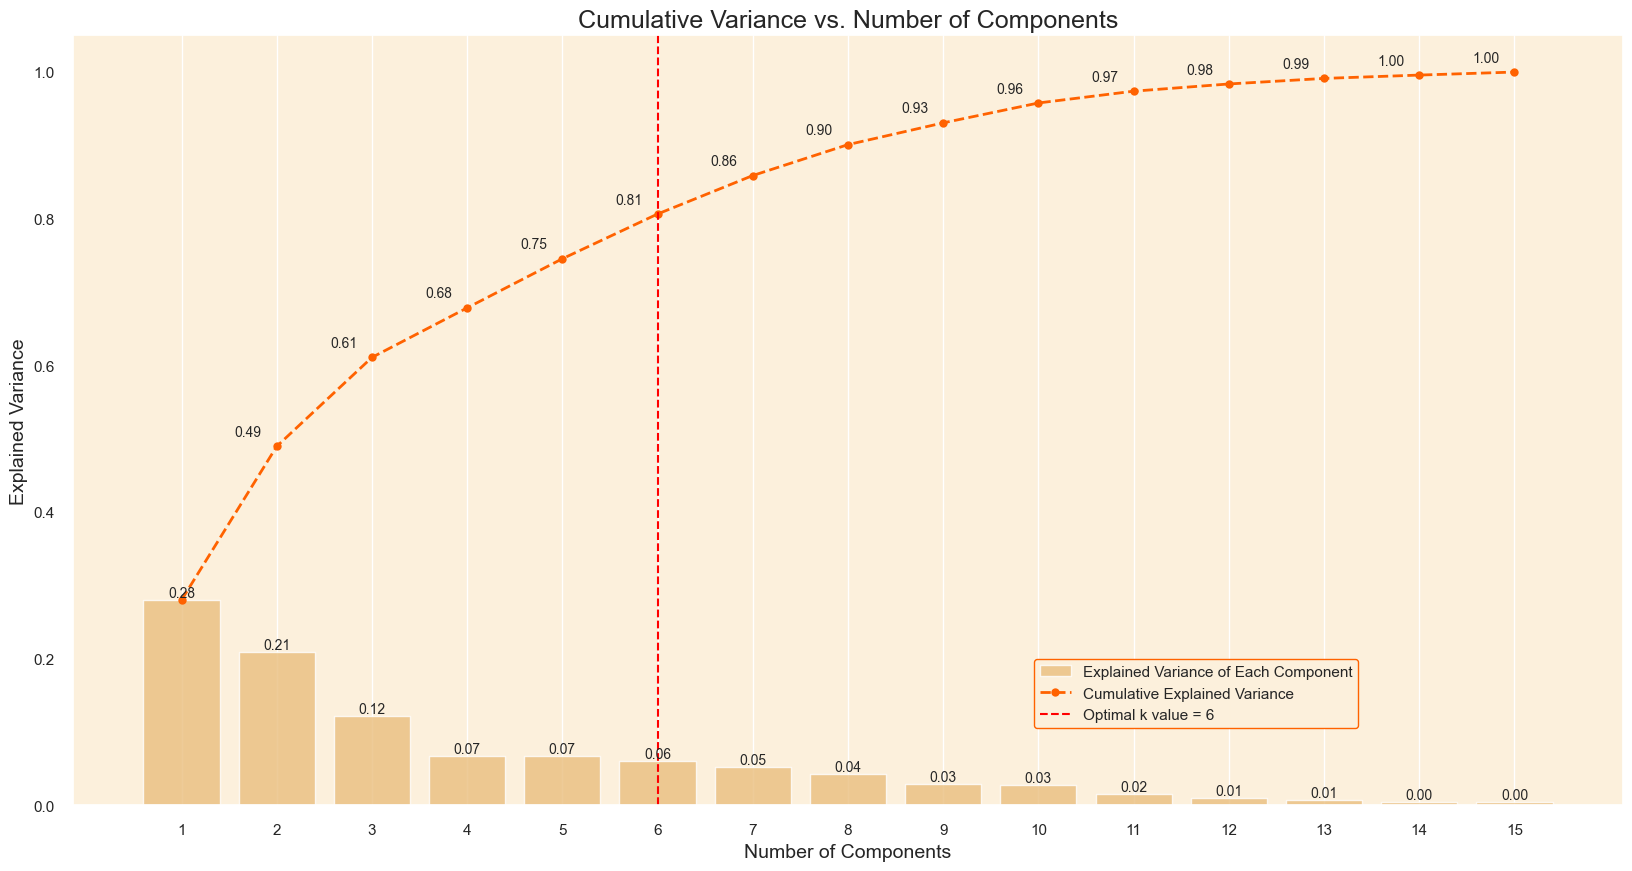

In [254]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

To find the best number of components, we look for the "elbow point" where adding more components doesn't boost explained variance much.
- In our case, after the 6th component, the increase slows down, explaining around 81% of total variance.

- For customer segmentation, retaining these 6 components strikes a balance between capturing enough information to identify distinct groups and reducing dimensionality.

In [255]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [256]:
customer_data_pca.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
16758.0,-1.268714,-0.525633,0.721284,-0.158971,-0.512735,0.416688
14292.0,5.204329,-2.627280,-1.497511,0.449260,0.112910,-0.509634
17114.0,0.555184,3.413505,-2.284127,-0.218246,0.260261,-0.495473
13815.0,4.592742,-2.495319,2.420027,1.084307,0.423594,1.029020
14406.0,-1.976271,1.519883,-0.292021,-0.146683,-0.987955,0.784270


In [257]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  Blue' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)


,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.216444,-0.007379,0.049116,0.322230,-0.202285,-0.410461
Total_Transactions,0.387601,0.007087,-0.247153,-0.122899,-0.033425,-0.026299
Total_Products_Purchased,0.400811,-0.001687,0.078246,-0.135119,0.034313,-0.011910
Total_Spend,0.431046,0.002410,0.074699,-0.086934,0.009781,-0.034275
Average_Transaction_Value,0.162714,-0.017872,0.596165,0.099362,0.031493,-0.111695
unique_products_purchased,0.327368,0.056986,0.028376,-0.183991,-0.210567,0.153894
Average_Days_Between_Purchases,-0.022167,-0.037192,-0.129525,-0.274941,0.694295,0.193764
Day_Of_Week,-0.006416,0.995059,-0.009310,0.015532,0.062400,-0.059662
Hour,-0.014555,0.056337,-0.009264,-0.083777,-0.573398,0.616144
Is_UK,0.000917,0.006747,-0.018494,-0.008650,-0.007949,0.015967


# K-Means Clustering

machine learning algorithm that’s suitable for customer segmentation problems is the `k-means clustering` algorithm. 
- There are other clustering algorithms as well such as `DBSCAN`, `Agglomerative Clustering`, and `BIRCH`, etc.

`K-Means` is an unsupervised learning method that sorts data into `K` groups by minimizing the within-cluster sum-of-squares (`WCSS`), or `inertia`.
It organizes information into different groups by making them as compact as possible, minimizing the distance within each group. It does this by repeatedly assigning each piece of data to the closest center and readjusting those centers until the groups are well-defined. This continues until everything settles into place or until it decides it's done.

## Drawbacks of `K-Means`

- Influence of high dimensions: Inertia increases in high-dimensional spaces, distorting distances.

    - Solution: Reduce dimensions with PCA before applying K-means.

- Initial centroid placement: Might converge to local instead of global minimum.

    - Solution: Use k-means++ initialization method.

- Number of clusters: Requires predefined K.

    - Solution: Use elbow method or silhouette analysis for estimation.

- Uneven clusters: Struggles with differently sized or sparse clusters.

    - Solution: Increase random initializations or consider GMM or DBSCAN.

- Assumes spherical clusters: May not work well for non-convex or elongated clusters.

    - Solution: Try DBSCAN or GMM for more flexible shapes.

I first used `PCA` to simplify the data. Then, for `KMeans`, I opted for smarter initial guesses (`k-means++`) and tried `10` different starting points (`n_init`). To find the perfect number of clusters, I'll look for the `elbow` and use `silhouette` analysis. Plus, I'm open to trying out `GMM` and `DBSCAN` later on to see if they do a better job at splitting the groups.

## Determining the Optimal Number of Clusters

### `Elbow Method`

The elbow method helps find the optimal number of clusters by looking for the `elbow` point in a plot of the within-cluster sum of squares (WCSS) against the number of clusters. This point indicates where adding more clusters doesn't significantly decrease the WCSS anymore, suggesting that additional clusters don't add much explanatory power.

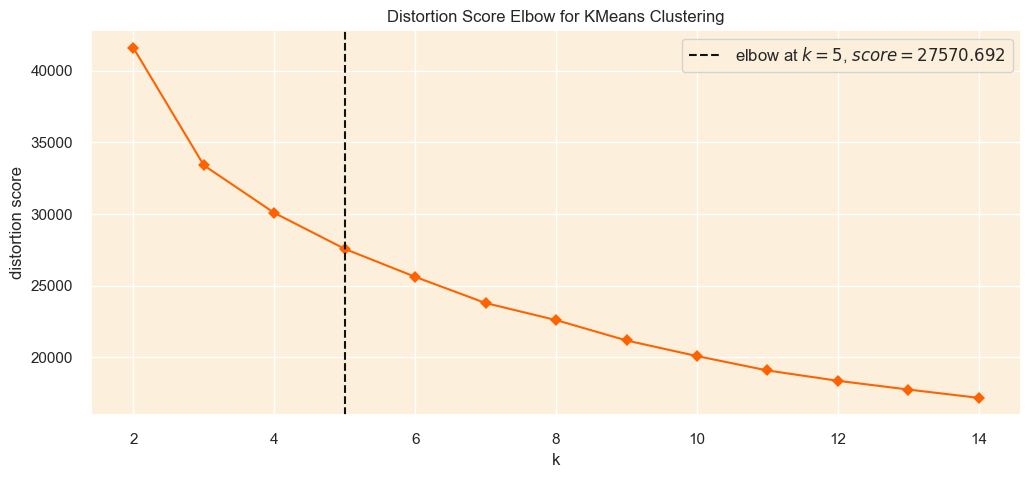

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [258]:
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)


fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show()

### Inference:

The Elbow method suggests an optimal k value of 5, but with no clear elbow point. Inertia decreases noticeably up to k=5, indicating the optimal k might be between 3 and 7. Silhouette analysis and business insights will help narrow down the best k within this range.

### `silhouette method`

The silhouette method assesses how well each data point fits its assigned cluster, providing a measure of clustering quality. A high average silhouette width indicates that the data points are well-clustered, with good cohesion within clusters and clear separation between them.

- Silhouette Coefficient (Silhouette Coeff):

    - Calculate a(i): Compute the average distance between point i and all other points within its cluster.
    - Calculate b(i):Compute the average distance between point i and all points in the nearest cluster to its own.
    - Compute the silhouette coefficient, s(i):
        $$ s(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))} $$

- Silhouette Score:

    - The silhouette score is the average silhouette coefficient across all data points in a dataset.
    - It provides an overall assessment of the clustering quality.
    - Higher silhouette scores indicate better clustering:


In the analysis:

- I'll start by considering a range of 2-6 clusters (k) based on the Elbow method.
- Next, I'll plot Silhouette scores for each k to find the one with the highest score.
- Then, to refine the selection of the best k, I'll generate Silhouette plots showing silhouette coefficients for each data point within different clusters.
- The YellowBrick library will be used for creating these plots, enabling easy comparison and analysis.

In [259]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

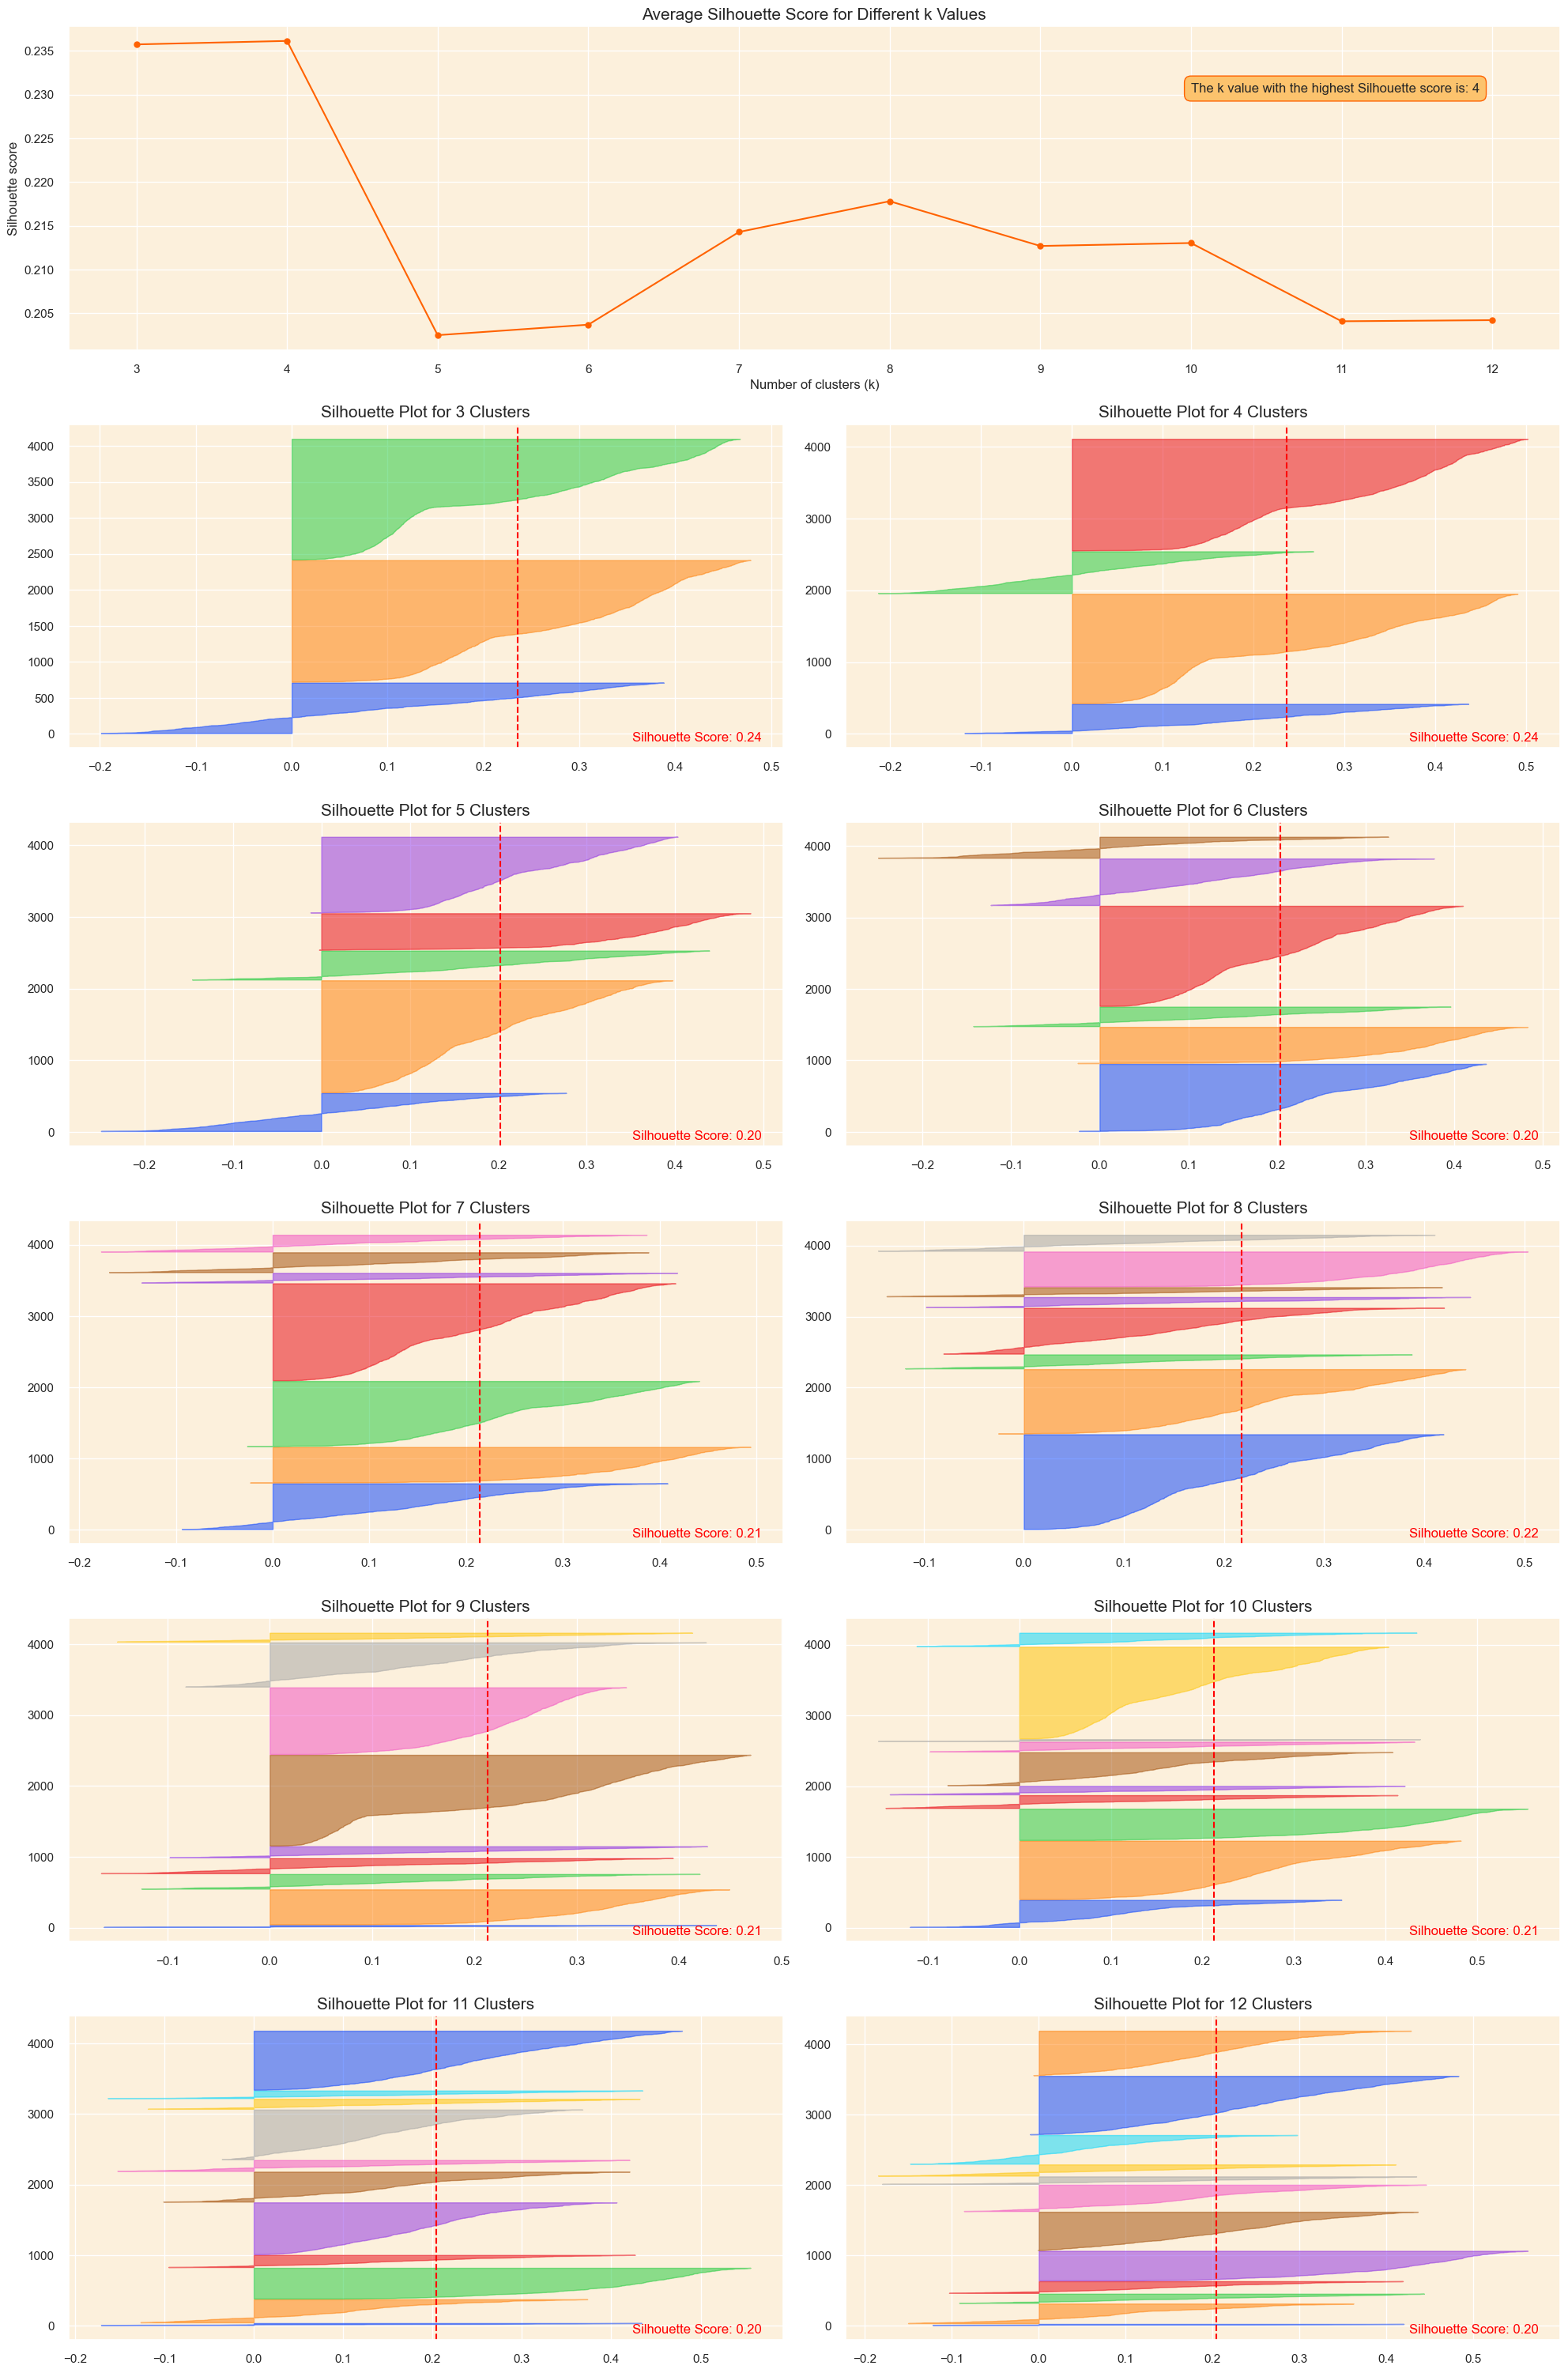

In [260]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

### Inference:

 after careful consideration of the silhouette plots, it's evident that selecting `k=3` is the superior option. This decision yields clusters that are more evenly matched and well-defined, thus strengthening our clustering solution and enhancing its reliability.

# Clustering Model - K-means

K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [261]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
cleaned_customer_data['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

## Clustering Evaluation

The evaluation metrics and a visualization technique I plan to use are outlined below:
    
- 3D Visualization of Top PCs

    
- Cluster Distribution Visualization
    
    
- Evaluation Metrics
    
    * Silhouette Score
    * Calinski Harabasz Score
    * Davies Bouldin Score

In [262]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

### 3D Visualization of Top PCs

In [263]:
import plotly.express as px
# Create a 3D scatter plot
fig = px.scatter_3d(customer_data_pca, x='PC1', y='PC2', z='PC3', color='cluster',
                    color_discrete_sequence=colors, opacity=0.4,
                    title='3D Visualization of Customer Clusters in PCA Space',
                    labels={'cluster': 'Cluster'},
                    width=900, height=800)

fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)
fig.show()



### Cluster Distribution Visualization

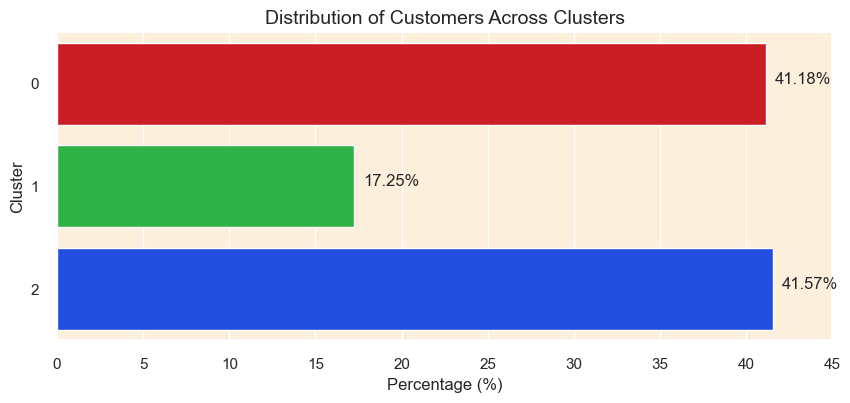

In [264]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

### Inference:

The bar plot shows a balanced spread of customers across clusters, with clusters 0 and 2 each containing around 41% of customers, and cluster 1 having about 18%.

This suggests our clustering process was successful in finding meaningful patterns, not just random noise. Each cluster represents a distinct group of customers, helping us understand our customer base better for future strategies.

It's reassuring that no cluster has a very small percentage of customers, meaning each group is significant. This gives us confidence that our clusters are not just capturing outliers.

### Evaluation Metrics
    
- Silhouette Score
- Calinski Harabasz Score: Also known as the Variance Ratio Criterion, it evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined clusters.
- Davies Bouldin Score: Measures the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering.

In [265]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
metrics = {
    "Silhouette Score": silhouette_score(X, clusters),
    "Calinski Harabasz Score": calinski_harabasz_score(X, clusters),
    "Davies Bouldin Score": davies_bouldin_score(X, clusters)
}

print("Number of Observations:", num_observations)
for metric, value in metrics.items():
    print(metric + ":", value)

Number of Observations: 4070
Silhouette Score: 0.2357222775882035
Calinski Harabasz Score: 1266.0822326139053
Davies Bouldin Score: 1.3719360273205663


- Silhouette Score: The silhouette score of 0.236 indicates that the clusters are reasonably well-separated and internally cohesive. A score closer to 1 would suggest even better clustering, but this score still indicates a meaningful clustering structure.

- Calinski Harabasz Score: The Calinski Harabasz score of 1257.17 is relatively high, suggesting that the clusters are well-separated and distinct from each other. This score reinforces the notion that the clusters capture meaningful patterns in the data.

- Davies Bouldin Score: The Davies Bouldin score of 1.368 suggests that the clusters are relatively well-separated, with a low average similarity between clusters. This score is within a reasonable range, indicating the presence of distinct clusters.

The computed metrics suggest that the clustering algorithm has performed well. The clusters are reasonably well-separated and internally cohesive, indicating meaningful patterns in the data.

## Cluster Analysis and Profiling

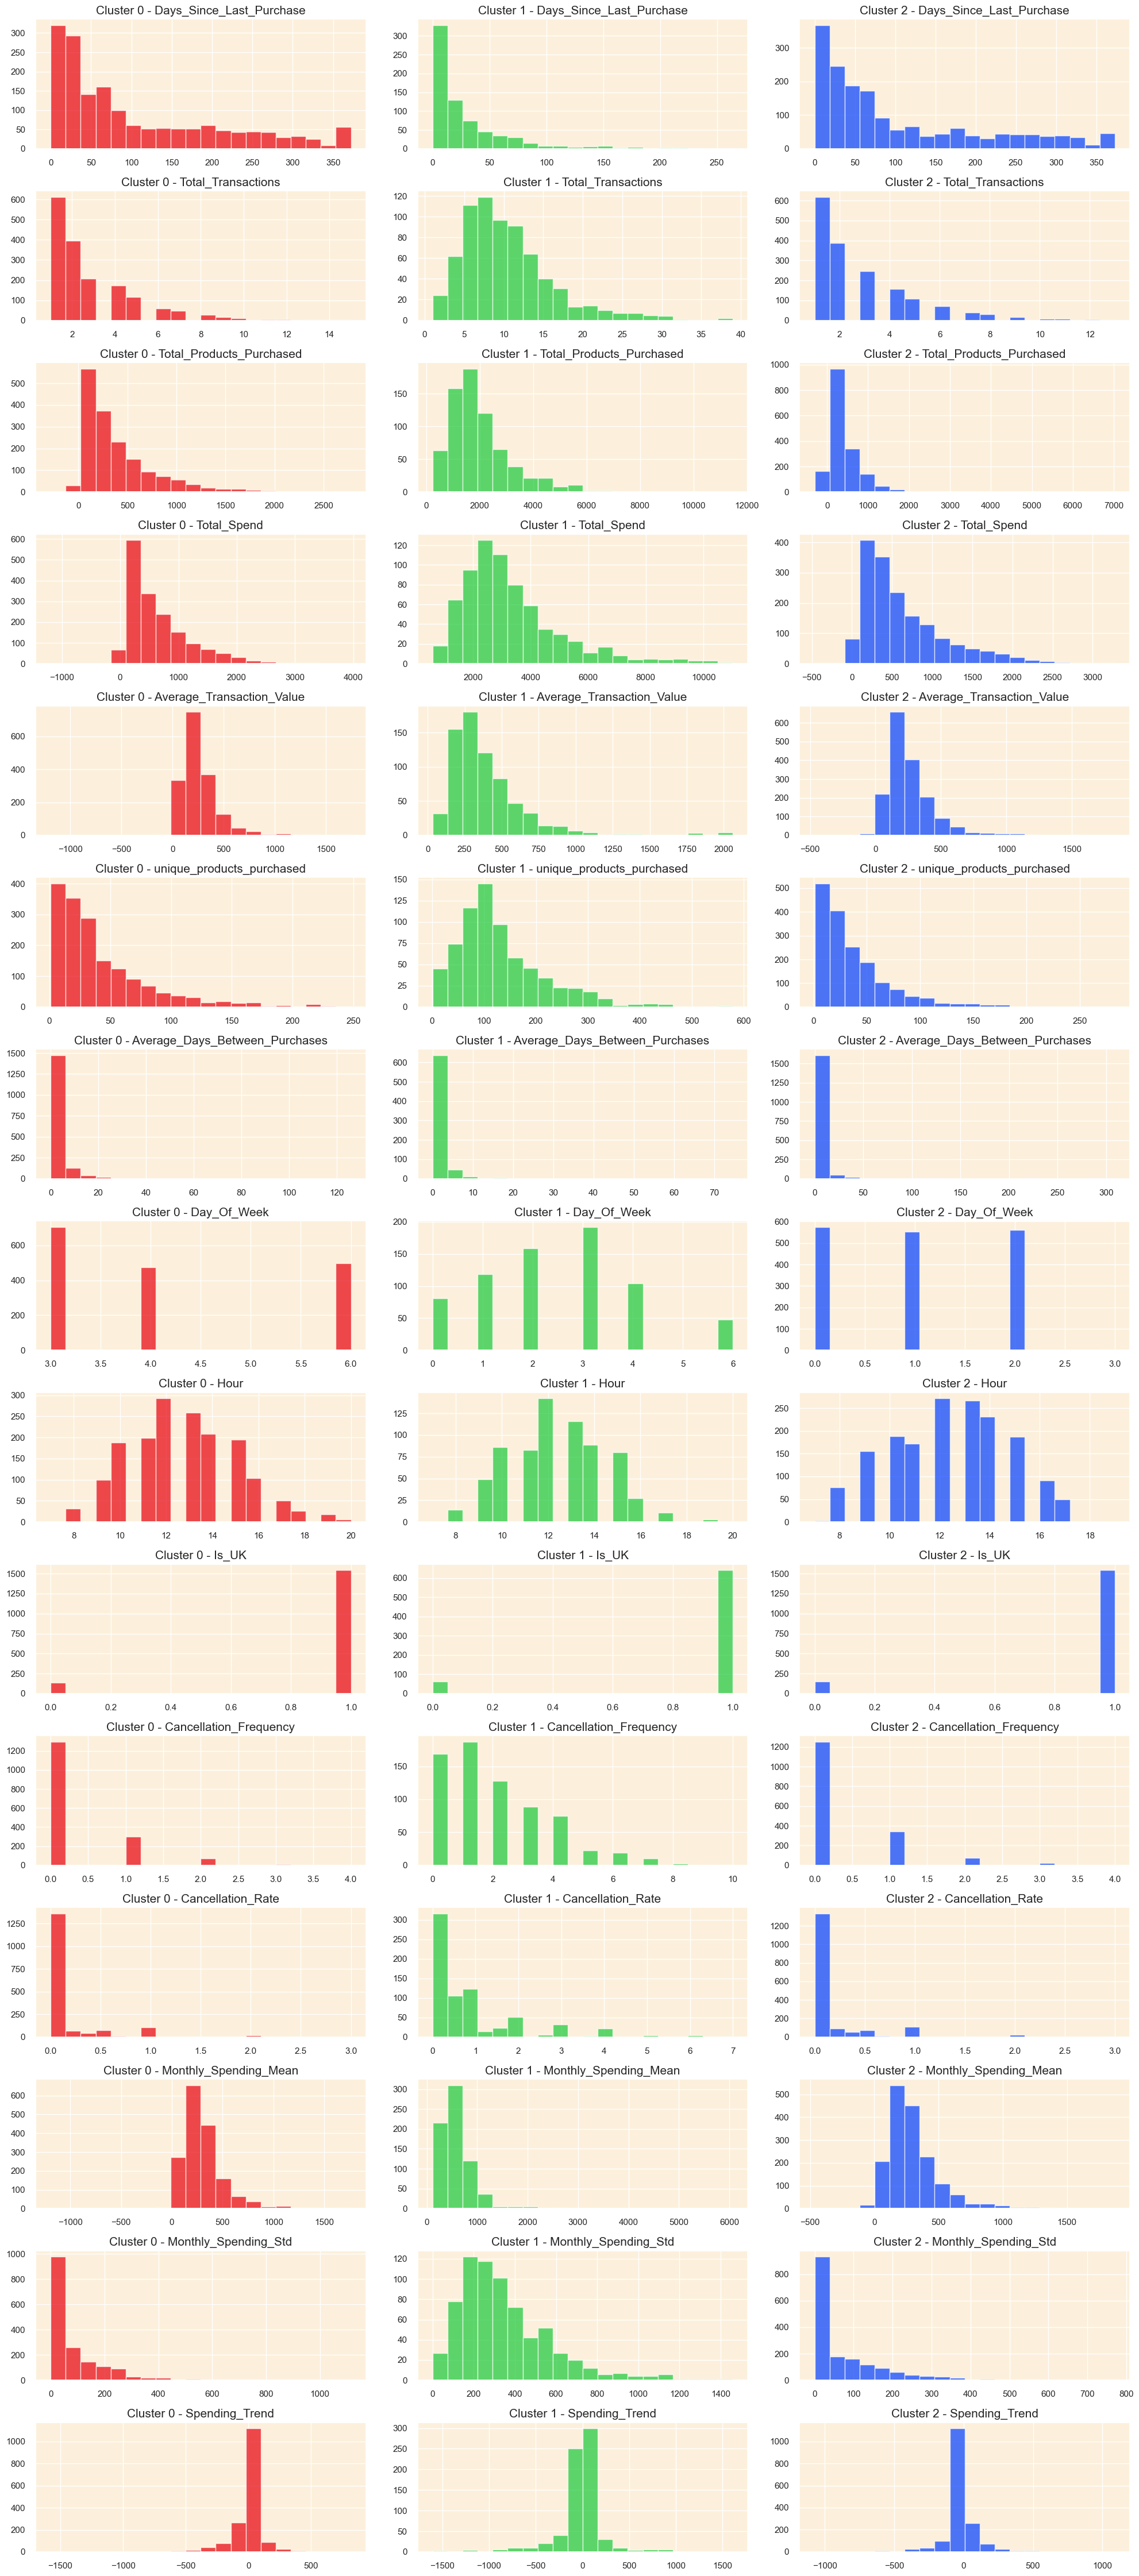

In [266]:
# Plot histograms for each feature segmented by the clusters
features = cleaned_customer_data.columns[1:-1]
clusters = cleaned_customer_data['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = cleaned_customer_data[cleaned_customer_data['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# Clusters Overview


* Cluster 0 - `Casual Weekend Shoppers`:
Customers in this cluster exhibit the following characteristics:

    - They shop less frequently and spend less money compared to other clusters.
    - Preference for shopping during weekends, possibly engaging in casual or window shopping.
    - Stable spending habits with little fluctuation in monthly spending.
    - Rarely cancel transactions, indicating decisive shopping behavior.
    - Lower spending per transaction compared to other clusters.

* Cluster 1 - `Occasional Big Spenders`:
Customers in this cluster display the following traits:

    - Infrequent shopping but significant spending when they do purchase.
    - Rising spending trends, indicating growing interest or investment in purchases.
    - Preference for shopping later in the day, potentially after work hours.
    - Moderate tendency to cancel transactions, possibly due to reconsideration of purchases.
    - Preference for substantial purchases, suggesting a preference for quality or premium products.

* Cluster 2 - `Eager Early-Bird Shoppers`:
Customers in this cluster demonstrate the following behaviors:

    - High spending habits with a tendency to buy a wide variety of products.
    - Engage in numerous transactions, indicating active participation in shopping.
    - Significant transaction cancellation, suggesting impulsive buying behaviors.
    - Preference for shopping during the early hours of the day.
    - Variable spending patterns with fluctuations in monthly spending.
    - Slight decrease in spending trend, indicating potential changes in shopping habits over time.

# Recommendation System

In [267]:
# Remove outlier transactions
df_filtered = df[~df['CustomerID'].isin(outliers_data['CustomerID'].astype(float).unique())]

# Merging transaction data with customer data
merged_data = df_filtered.merge(cleaned_customer_data.astype(float), on='CustomerID', how='inner')

# Identify top 10 best-selling products per cluster
top_products_per_cluster = (merged_data.groupby(['cluster', 'StockCode', 'Description'])
                            ['Quantity'].sum().reset_index()
                            .sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
                            .groupby('cluster').head(10))

# Generate recommendations for each customer in each cluster
recommendations = []
for cluster, group in top_products_per_cluster.groupby('cluster'):
    customers_in_cluster = cleaned_customer_data[cleaned_customer_data['cluster'] == cluster]['CustomerID']
    for customer in customers_in_cluster:
        purchased_products = merged_data[(merged_data['CustomerID'] == customer) & (merged_data['cluster'] == cluster)]['StockCode'].tolist()
        top_not_purchased = group[~group['StockCode'].isin(purchased_products)].head(3)
        recommendations.append([customer, cluster] + top_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Creating recommendations dataframe and merge with customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = cleaned_customer_data.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')


In [268]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
16172.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
15016.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
17667.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
13982.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
14790.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14327.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
17572.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE
13067.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14962.0,84879,ASSORTED COLOUR BIRD ORNAMENT,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,17003,BROCADE RING PURSE


## Conclusion


The work described in this notebook is based on a `database` providing details on purchases made on an `E-commerce` platform over a period of one year. Each entry in the dataset describes the purchase of a `product`, by a `particular customer` and at a given `date`. In total, approximately  `∼4000 clients` appear in the database. Given the available information, I decided to develop a `Recommendation System` that allows to recommend the type of purchase that a customer should make.

## Based on the characteristics of each cluster, we can tailor recommendations:



Understanding each customer cluster's unique traits allows businesses to tailor marketing strategies, offering exclusive deals for casual weekend shoppers, personalized recommendations for occasional big spenders, and impulsive-buy incentives for eager early-bird shoppers, fostering loyalty and maximizing sales.

### Cluster 0 - Casual Weekend Shoppers:

- Weekend Promotions: Offer special discounts or promotions during weekends to attract these customers.
- Convenience: Ensure convenient shopping experiences with easy navigation and quick checkout processes.
- Product Bundles: Create product bundles or packages targeting casual shoppers looking for multiple items.

### Cluster 1 - Occasional Big Spenders:

- High-Value Products: Highlight premium or high-value products to appeal to their willingness to spend.
- Exclusive Deals: Provide exclusive deals or early access to new products to incentivize purchases.
- Personalized Recommendations: Offer personalized product recommendations based on their past purchases to encourage repeat buying.

### Cluster 2 - Eager Early-Bird Shoppers:

- Early Morning Deals: Launch special promotions or flash sales during early morning hours to capture their attention.
- Impulse Purchase Offers: Create limited-time offers or discounts to capitalize on their impulsive buying behavior.
- Loyalty Programs: Implement loyalty programs with rewards for frequent shoppers to encourage repeat purchases and retain their loyalty.